In [55]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


In [56]:
# Select images
data_dir = './Datas/images'
batch_size = 128
img_height = 128
img_width = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

def augment(image, label):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  image = tf.image.random_contrast(image, lower=0.1, upper=1.0)
  image = tf.image.random_brightness(image, 0.2)
  image = tf.image.random_saturation(image, lower=0.1, upper=1.0)
  return (image, label)

class_names = train_ds.class_names
print(class_names)

train_ds = train_ds.map(augment).concatenate(train_ds)

Found 48605 files belonging to 2 classes.
Using 38884 files for training.
Found 48605 files belonging to 2 classes.
Using 9721 files for validation.
['ELLIPTICAL', 'SPIRAL']


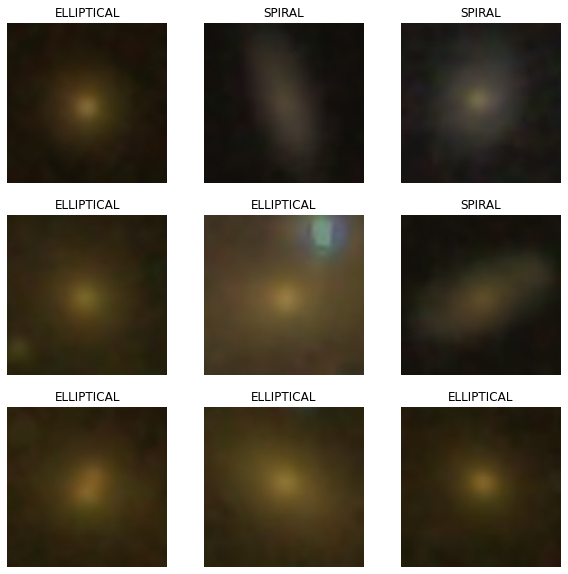

In [57]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.show()

In [72]:
num_classes = len(class_names)

model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.60),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

epochs = 10

history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
)

Epoch 1/10


2022-02-10 20:32:55.010382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


608/608 [==============================] - ETA: 0s - loss: 0.3592 - accuracy: 0.8310

2022-02-10 20:34:22.834002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


608/608 [==============================] - 92s 149ms/step - loss: 0.3592 - accuracy: 0.8310 - val_loss: 0.1348 - val_accuracy: 0.9500
Epoch 2/10
608/608 [==============================] - 89s 147ms/step - loss: 0.2452 - accuracy: 0.8985 - val_loss: 0.0873 - val_accuracy: 0.9689
Epoch 3/10
608/608 [==============================] - 89s 147ms/step - loss: 0.1773 - accuracy: 0.9337 - val_loss: 0.0823 - val_accuracy: 0.9711
Epoch 4/10
608/608 [==============================] - 89s 147ms/step - loss: 0.1513 - accuracy: 0.9432 - val_loss: 0.0745 - val_accuracy: 0.9729
Epoch 5/10
608/608 [==============================] - 90s 147ms/step - loss: 0.1427 - accuracy: 0.9468 - val_loss: 0.0704 - val_accuracy: 0.9776
Epoch 6/10
608/608 [==============================] - 91s 150ms/step - loss: 0.1251 - accuracy: 0.9544 - val_loss: 0.0642 - val_accuracy: 0.9758
Epoch 7/10
608/608 [==============================] - 90s 147ms/step - loss: 0.1265 - accuracy: 0.9551 - val_loss: 0.0658 - val_accuracy: 0.9

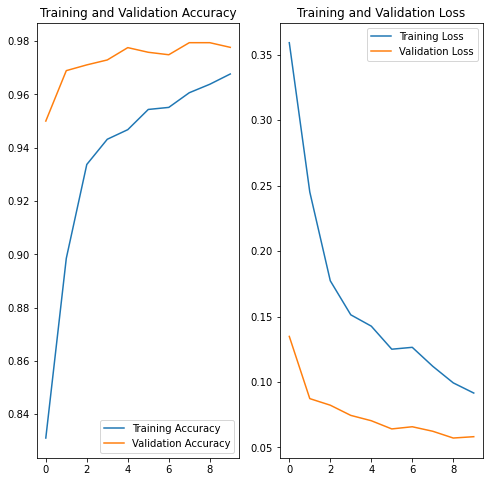

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [80]:
img = tf.keras.preprocessing.image.load_img("spiral1.jpg")

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to SPIRAL with a 23.20 percent confidence.


In [81]:
!mkdir -p saved_model
model.save('saved_model/modele_trop_fort')

INFO:tensorflow:Assets written to: saved_model/modele_trop_fort/assets
